     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
  label                                               Text  label_enc
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro

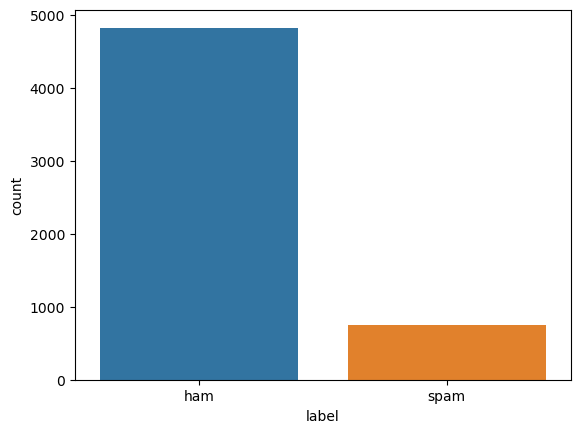

15
15585
(1195,) (1195,) (299,) (299,)
0.9698996655518395
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       145
           1       0.98      0.96      0.97       154

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Execution Time: 0.03551340103149414


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import time

# Reading the data
df = pd.read_csv(r'C:\Users\Win10\Downloads\Kaggle Dataset\spam.csv', encoding='latin1')
print(df.head())

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

sns.countplot(x=df['label'])
plt.show()

# Find average number of tokens in all sentences
avg_words_len = round(sum([len(i.split()) for i in df['Text']]) / len(df['Text']))
print(avg_words_len)

# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length = len(s)
print(total_words_length)

# Splitting data for Training and testing
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})

# Performing undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(new_df['Text'].values.reshape(-1, 1), new_df['label'].values)

X_train, X_test, y_train_resampled, y_test = train_test_split(
    X_resampled.flatten(), y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, y_train_resampled.shape, X_test.shape, y_test.shape)

# Measure time complexity
start_time = time.time()

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)

alpha = 0.7  # Set the desired alpha value
fit_prior = False  # Set to True to fit class prior probabilities, False otherwise

baseline_model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
baseline_model.fit(X_train_vec, y_train_resampled)

nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

# Measure the end time complexity
end_time = time.time()
execution_time = end_time - start_time

# Print the execution time
print('Execution Time:', execution_time)
